In [15]:
from Bio import AlignIO
import matplotlib.pyplot as plt

from Bio.Align import MultipleSeqAlignment
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

import rich
from rich_msa import RichAlignment

import logomaker
import pandas as pd

#Import modules
import gzip, logomaker, matplotlib.pyplot as plt, numpy as np, os, pandas as pd, protfasta

In [16]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Generate alignment

In [17]:
# Create an alignment for the sequences around WxxLF
! mafft --auto IntegralAround_WxxLF_-50_+20_top69.fasta > AllSeqs_IntegralAround_WxxLF_-50_+20_top69_mafft.fasta

outputhat23=16
treein = 0
compacttree = 0
stacksize: 8176 kb
rescale = 1
All-to-all alignment.
tbfast-pair (aa) Version 7.526
alg=L, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
0 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
   60 / 69
done.

Progressive alignment ... 
STEP    21 /68 
Reallocating..done. *alloclen = 1142
STEP    68 /68 
done.
tbfast (aa) Version 7.526
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
1 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.
rescale = 1

   60 / 69
Segment   1/  1    1- 128
STEP 003-062-0  identical.    rejected. rejected. identical.   
Converged.

done
dvtditr (aa) Version 7.526
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, nosh

In [18]:
# Filter the alignment to remove gaps (remove positions that are more than 90% gaps)
# This is for the top 69 most active sequences

alignment = AlignIO.read("AllSeqs_IntegralAround_WxxLF_-50_+20_top69_mafft.fasta", "fasta")
gap_threshold = 0.9

columns_to_keep = []
num_sequences = len(alignment)

# Get columns with less than 90% gaps
for col_idx in range(alignment.get_alignment_length()):
    column = alignment[:, col_idx]
    num_gaps = column.count('-')
    gap_fraction = num_gaps / num_sequences

    if gap_fraction < gap_threshold:
        columns_to_keep.append(col_idx)

# Write filtered alignment to list
filtered_records = []
for record in alignment:
    filtered_seq = ''.join(record.seq[i] for i in columns_to_keep)
    filtered_records.append(SeqRecord(Seq(filtered_seq), id=record.id, description=record.description))

# Turn list into Biopython alignment object
filtered_alignment_69 = MultipleSeqAlignment(filtered_records)

# Save the filtered alignment
AlignIO.write(filtered_alignment_69, "AllSeqs_IntegralAround_WxxLF_-50_+20_top69_mafft_filtered.fasta", "fasta")


1

In [19]:
# Filter the alignment to remove gaps (remove positions that are more than 90% gaps)
# This is for the top 138 most active sequences
alignment = AlignIO.read("AllSeqs_IntegralAround_WxxLF_-50_+20_top138_mafft.fasta", "fasta")

gap_threshold = 0.9

# Get columns with less than 90% gaps
columns_to_keep = []
num_sequences = len(alignment)

for col_idx in range(alignment.get_alignment_length()):
    column = alignment[:, col_idx]
    num_gaps = column.count('-')
    gap_fraction = num_gaps / num_sequences

    if gap_fraction < gap_threshold:
        columns_to_keep.append(col_idx)

# Write filtered alignment to list
filtered_records = []
for record in alignment:
    filtered_seq = ''.join(record.seq[i] for i in columns_to_keep)
    filtered_records.append(SeqRecord(Seq(filtered_seq), id=record.id, description=record.description))

# Turn list into Biopython alignment object
filtered_alignment_138 = MultipleSeqAlignment(filtered_records)

# Save the filtered alignment
AlignIO.write(filtered_alignment_138, "AllSeqs_IntegralAround_WxxLF_-50_+20_top138_mafft_filtered.fasta", "fasta")


1

In [29]:
# Amino acid colors, where gaps are colored black (used in actual alignment)
# Colors used for the alignment barplots and the sequence motifs
amino_acid_colors_black = {
    # Purples
    'F': '#ECA758',  
    'W': '#306BAC',
    'L': '#562F7F',

    # Reds
    'D': '#D04741', 
    'E': '#EAA3A7', 

    # Blues
    'K': '#52B0E1', 
    'R': '#52B0E1', 

    # black
    'S': '#000000', 
    'P': '#000000',

    # greys
    'A': '#787878',
    'V': '#787878',
    'I': '#787878',
    'M': '#787878',
    'T': '#787878',
    'G': '#787878',
    'C': '#787878',
    'N': '#787878',
    'Q': '#787878',
    'H': '#787878',  
    'Y': '#787878', 
    '-': "#000000"
}

# Make pretty alignment visualization

In [30]:
viewer = RichAlignment(
    names=["" for record in filtered_alignment_69],
    sequences=[str(record.seq) for record in filtered_alignment_69], 
    styles=amino_acid_colors_black
)

In [31]:
# Use a console to display alignment on one line
console = rich.console.Console(force_terminal=False, width=150, record=True)
align = rich.align.Align(viewer, width=150)
console.print(align)

# Save the stuff printed to the console as html format
html_txt = console.export_html()

# Write html to file
with open("alignment_69_filtered_new_colors.html", "w+") as f:
    f.write(html_txt)

 1  ------------------------------------------------------MFT--DLDV-----AGHEDWPSLFDHSSEPLNAFDLATL                                                  
    1  --SEEQEDDQFMTIPPLN---------EL--DSNVVDAFF------SSSTDSTPMFEFESLD----ESNDPKNWTSLFENDLPIITEDDVSLN                                                  
    1  SAP-------GLSAPDSSL--------AF--HSEVLDSVFS----NDEAVDHTPMFDELDFMLES---SNKEDWVSLFDANNEIDNSFNFTKV                                                  
    1  --PKDLFMD--ASAPPSASFTDLSTP-SF--ESPGY-----------FSQDTSPMFAT-DMELG----PGVEEWGSLFPSQDDFSLGLDTTAL                                                  
    1  ISPRDLMMD--TSVPPSGTFTDLSTP-SF--ESPGN-----------FSQNASPMFT--DMDL-----VGHEEWPSLFDGASDM-NAFDLANL                                                  
    1  --PKDLFMD--ASAPPSTSFTDLSTP-SF--ESPGY-----------FSQDTSPMFPT-DLELN----PGHEEWDSLFPPQDGFPVAFDSAAL                                                  
    1  ISPKDLMMD--ASVPPSGTFTDLSTP-SF--ESPGN-----------FSQNTSPMFT--DLDV-----AGHEDWPSLFDHSSEPLNAFDLATL                                                  
    1  -------MD--ASVPPSGTFTDLSTP-SF--ESPGN-----------FSQNTSPMFT--DLDV-----AGHEDWPSLFDHSSEPLNAFDLATL                                                  
    1  

# Make alignment conservation plot

In [23]:
# Colors used for the alignment barplots and the sequence motifs
amino_acid_colors_white = {
    # Purples
    'F': '#ECA758',  
    'W': '#306BAC',
    'L': '#562F7F',

    # Reds
    'D': '#D04741', 
    'E': '#EAA3A7', 

    # Blues
    'K': '#52B0E1', 
    'R': '#52B0E1', 

    # black
    'S': '#000000', 
    'P': '#000000',

    # greys
    'A': '#787878',
    'V': '#787878',
    'I': '#787878',
    'M': '#787878',
    'T': '#787878',
    'G': '#787878',
    'C': '#787878',
    'N': '#787878',
    'Q': '#787878',
    'H': '#787878',  
    'Y': '#787878', 
    '-': "#FFFFFF"
}

def make_alignment_conservation_plot(alignment_file, output_file, remove_gaps=False):
    """
    Function to make alignment conservation plots.
    
    alignment_file: Input alignment file
    output_file: Where to save the image
    remove_gaps: Whether or not to remove positions that are over 90% gaps 
    """
    with open(alignment_file, "r") as f:
        lines = f.readlines()

    names = []
    seqs = []
    seq = ""

    for line in lines:
        if line.startswith(">"):
            names.append(line.strip().replace(">",""))
            if len(seq) > 0:
                seqs.append(seq)
                seq = ""
        else:
            seq += line.strip()

    seqs.append(seq)

    amino_acids = ['C', 'N', 'Q', 'T', 'G', 'A', 'V', 'I', 'M','Y','H', 'S', 'P', 'D', 'E', 'K', 'R', 'F', 'W', 'L', '-']

    # Each sequence position gets an dictionary is the list
    amino_acid_dicts = [{aa: 0 for aa in amino_acids}.copy() for _ in range(len(seqs[0]))]

    for seq in seqs: 
        for i, aa in enumerate(seq): 
            amino_acid_dicts[i][aa] += 1
    
    if remove_gaps: 
        filtered_aa_dict = []
        for aa_d in amino_acid_dicts:
            if aa_d['-'] < len(seqs) * .90:
                filtered_aa_dict.append(aa_d)
        amino_acid_dicts = filtered_aa_dict

    from matplotlib.lines import Line2D
    fig, ax = plt.subplots(figsize=(20,6))

    for i, count_dict in enumerate(amino_acid_dicts): 
        bottom = 0
        for aa, count in count_dict.items():
            p = ax.bar(i, count/len(seqs), label=aa, bottom=bottom, color = amino_acid_colors_white[aa])
            bottom += count/len(seqs)

    ax.set_xlabel("Alignment position", size=20)
    ax.set_ylabel("Percent of sequences", size=20)
    
    ax.spines[['right', 'top']].set_visible(False)

    custom_lines = []

    for color in list(amino_acid_colors_white.values()):
        custom_lines.append(Line2D([0], [0], color=color, lw=2))

    ax.legend(custom_lines, list(amino_acid_colors_white.keys()), bbox_to_anchor=(1.05, 0.95), fontsize=10)
    plt.tight_layout()
    plt.savefig(output_file)

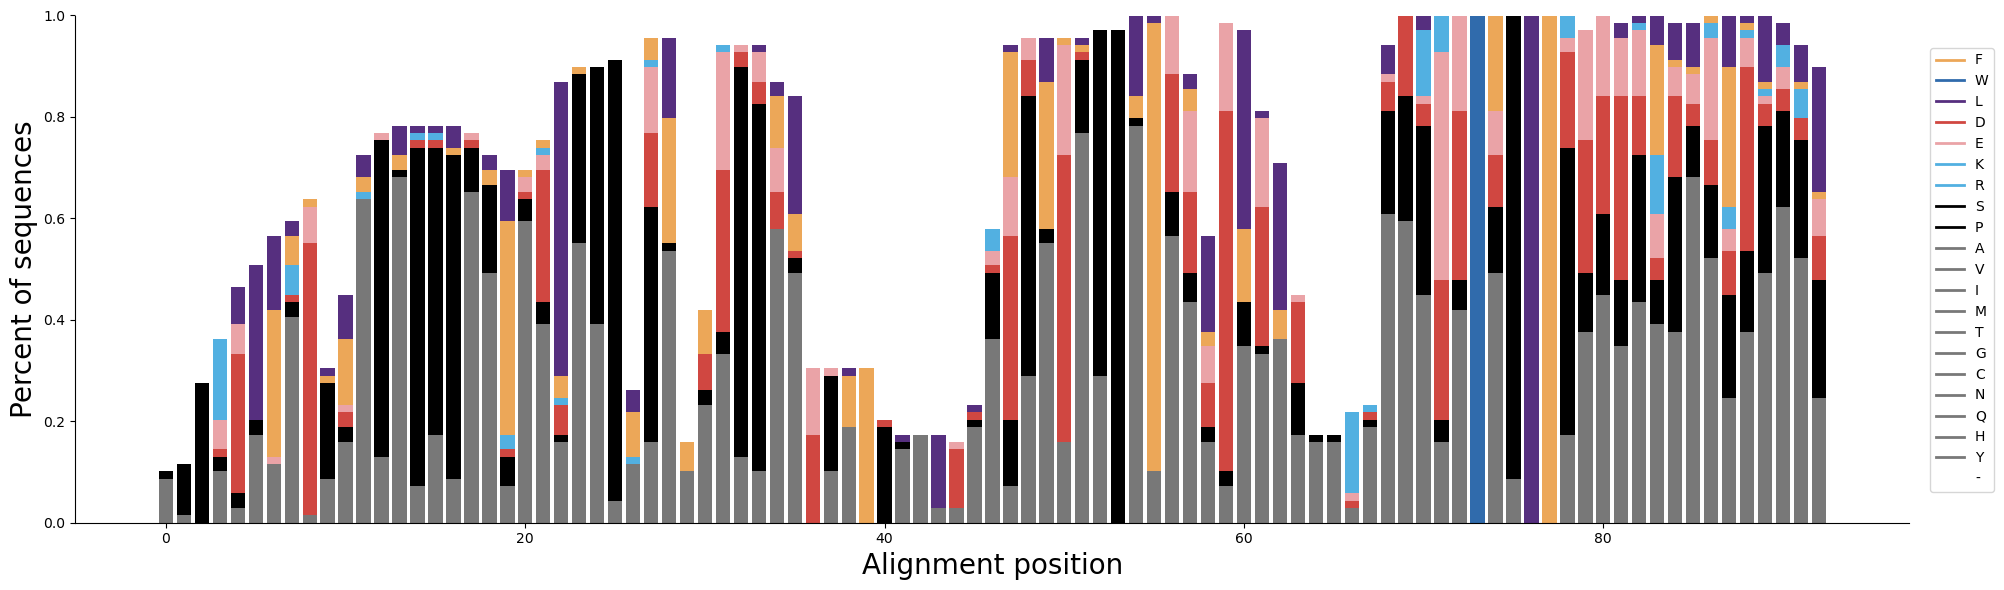

In [24]:
make_alignment_conservation_plot("AllSeqs_IntegralAround_WxxLF_-50_+20_top69_mafft_filtered.fasta", "AllSeqs_IntegralAround_WxxLF_-50_+20_top69_align_filtered.pdf")

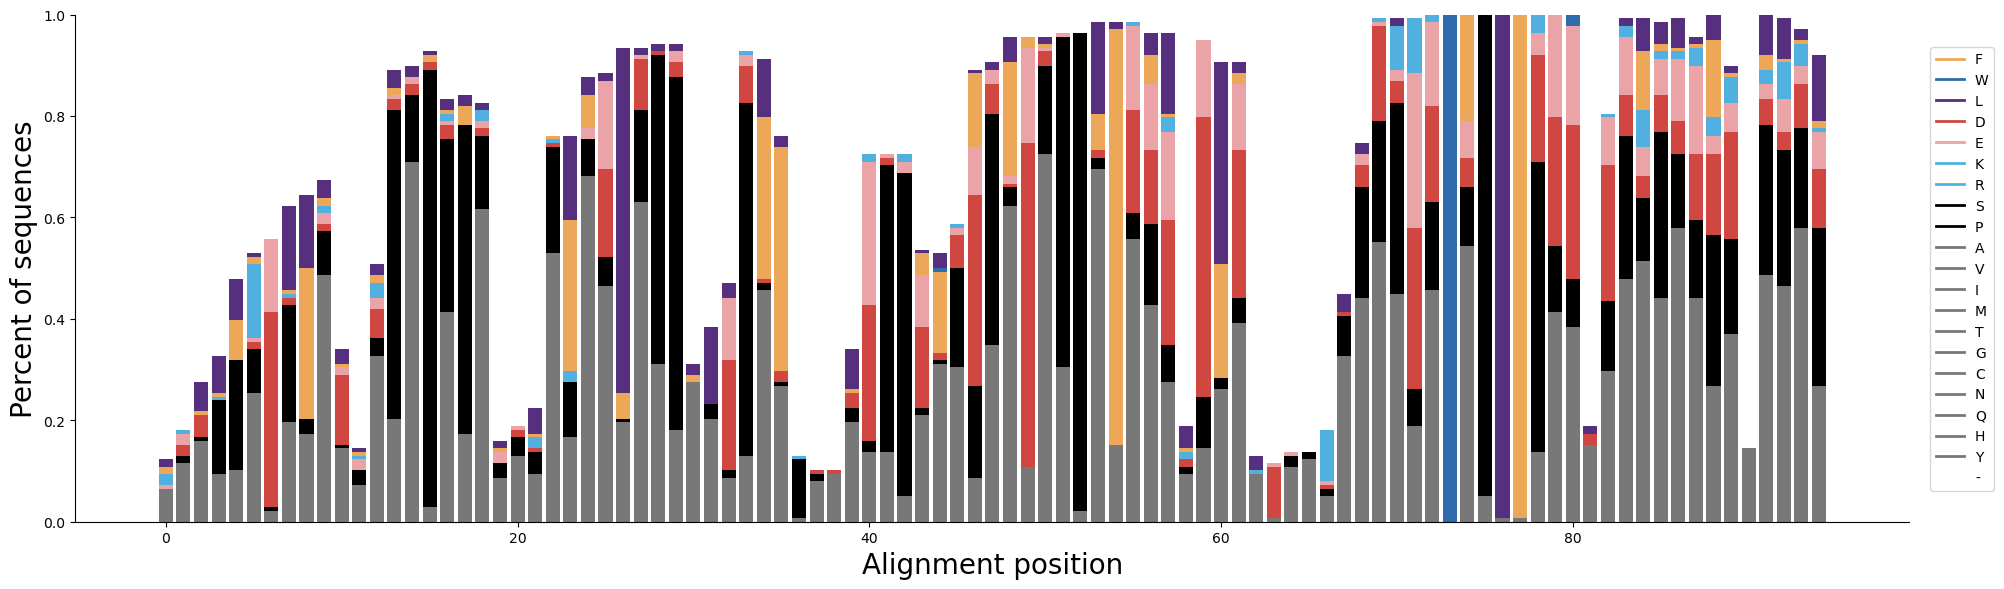

In [25]:
make_alignment_conservation_plot("AllSeqs_IntegralAround_WxxLF_-50_+20_top138_mafft_filtered.fasta", "AllSeqs_IntegralAround_WxxLF_-50_+20_top138_align_filtered.pdf")

# Make Logo

In [26]:
# Create a function that takes in a fasta file containing a multiple sequence alignment (MSA),
# a coloring scheme for each amino acid, the start and stop positions in the amino acid MSA (for the
# range that the LogoMaker covers), the x-axis tick spacing, and the width and height values for logo
def DrawLogo(alignment_file, AA_color_scheme, start_position, end_position, x_axis_tick_space, figure_width = 16, figure_height = 4):

    # Read in fasta file
    fasta_file = protfasta.read_fasta(alignment_file, invalid_sequence_action = 'ignore', alignment = True, expect_unique_header = False)

    # Convert the alignment into a dataframe
    fasta_file = pd.DataFrame(fasta_file.items(), columns = ['Name', 'Sequence'])

    # Extract the protein sequences only and split each character in the alignment into multiple different columns
    ManyColumnsDF = fasta_file['Sequence'].str.split('', expand=True)

    # Create an empty dataframe
    PercentIdentityDF = pd.DataFrame()

    # Create a for loop that updates the amino acid percent identities in each position of the sequence alignment
    for column in ManyColumnsDF.loc[:, start_position:end_position + 1].columns:
        AAs = ManyColumnsDF[column].value_counts()
        #Create a dictionary with all of the amino acid percent identities initialized to 0
        AA_dict = {'A':0, 'C':0, 'D':0, 'E':0, 'F':0, 'G':0, 'H':0, 'I':0, 'K':0, 'L':0, 'M':0, 'N':0, 'P':0, 'Q':0, 'R':0, 'S':0, 'T':0, 'V':0, 'W':0, 'Y':0}
        # Iterate though each amino acid present in the column and match it with its key in the dict
        for AA in AAs.index.tolist():   # 'AAs.index.tolist()' finds unique amino acids that are present
            for key in AA_dict:         # in a position in the alignment. It then adds them once to a list
                if key == AA:
                    #After matching an amino acid to its key, the value count of the amino acid is used
                    # to calculate the percent identity of an amino acid in a specific position in the alignment
                    AA_dict[key] = AA_dict[key] + round(AAs[AA]/sum(AAs.values.tolist()) * 100)
                    PID_DF2 = pd.DataFrame(list(AA_dict.items()), columns = ['AA Code', column]).set_index('AA Code')
                    PercentIdentityDF[column] = PID_DF2[column]
                else:
                    continue

    # Take a specific section from the protein MSA
    TransposedDF = PercentIdentityDF.transpose()
    
    # Create a logomaker Logo object
    logo = logomaker.Logo(TransposedDF, color_scheme = AA_color_scheme, figsize=(figure_width, figure_height))

    # Remove black lines bordering LogoMaker plot
    logo.style_spines(visible = False)
    
    # Adjust the tick marks and the labels for the x and y axes
    logo.ax.set_xticks(range(start_position, end_position + 1, x_axis_tick_space))
    logo.ax.set_yticks(range(0, 110, 10))
    logo.ax.set_xlabel('MSA Position')
    logo.ax.set_ylabel('Percent Identity')
    
    # Add black lines (spines) on the x and y axes
    logo.style_spines(spines=['bottom', 'left'], visible = True)

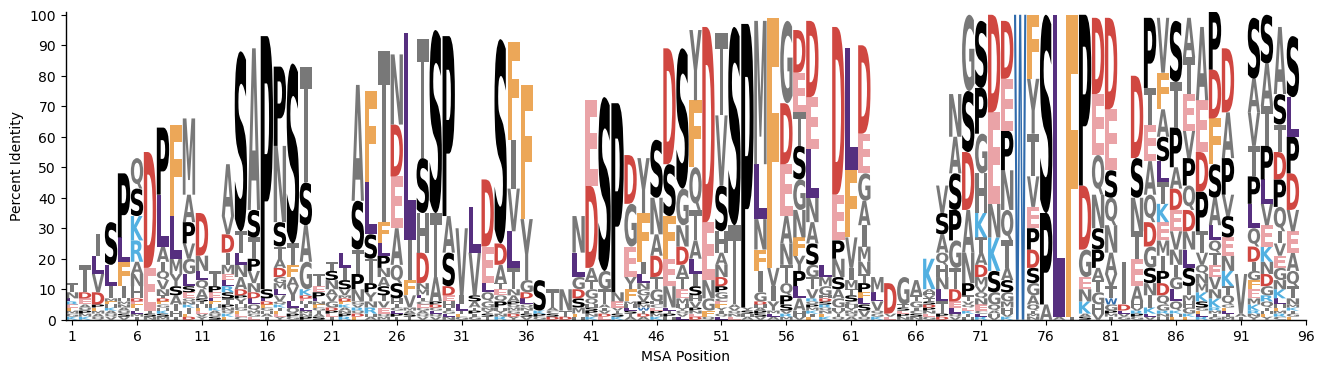

In [27]:
# Function to make web logos
DrawLogo(
    alignment_file = "AllSeqs_IntegralAround_WxxLF_-50_+20_top138_mafft_filtered.fasta",
    AA_color_scheme = amino_acid_colors_white,
    start_position = 1,  # Be careful with start/end positions;
    end_position = 96,    # might end up with an error if values aren't within range
    x_axis_tick_space = 5,
    figure_width = 16,
    figure_height = 4
)

plt.savefig("seq_logo_138.pdf")


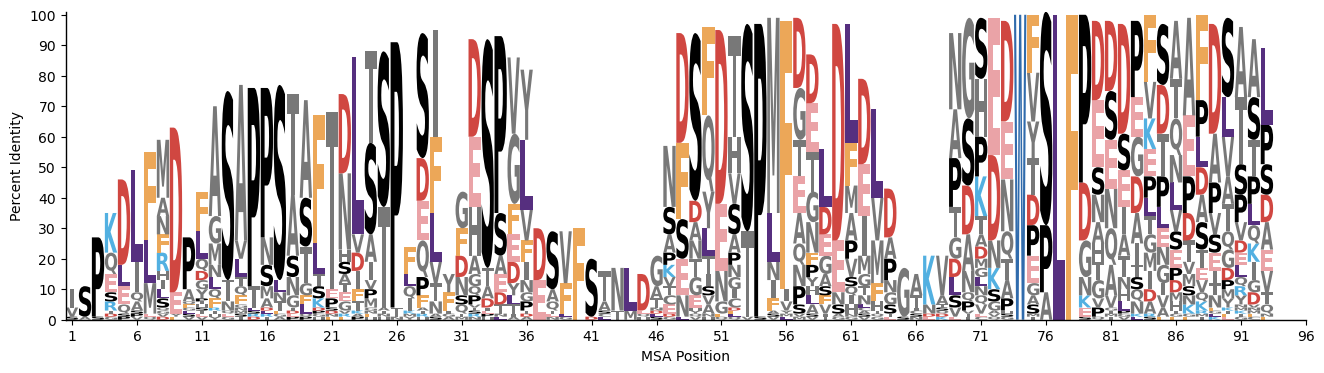

In [28]:
# Function to make web logos
DrawLogo(
    alignment_file = "AllSeqs_IntegralAround_WxxLF_-50_+20_top69_mafft_filtered.fasta",
    AA_color_scheme = amino_acid_colors_white,
    start_position = 1,  # Be careful with start/end positions;
    end_position = 96,    # might end up with an error if values aren't within range
    x_axis_tick_space = 5,
    figure_width = 16,
    figure_height = 4
)

plt.savefig("seq_logo_69.pdf")